# AMGeO-Earthcube Hackathon

Welcome to AMGeO's 2022 Hackathon!

This is a notebook template for getting started using AMGeO's 
new API

Below, when executing this cell, you will need to provide 
your AMGeO credentials to proceed. Please follow the instructions provided.

In [1]:
#Suppress ugly warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from AMGeO.api import AMGeOApi

api = AMGeOApi()

Solar wind data files will be saved to /home/jovyan/.local/share/nasaomnireader

------------IMPORTANT----------------------------
Unable to import spacepy. Will fall back to
using Omni text files, which may have slightly
different data and incomplete metadata
-------------------------------------------------



In [3]:
# set the output dir to directory with some preloaded assimilative maps
api.set_output_dir('./')

In [4]:
con = api.get_controller()
con.browse('N')

[datetime.date(2017, 9, 7)]

In [5]:
import datetime
ds = con.load(datetime.date(2017, 9, 7),'N')

In [6]:
ds['int_joule_heat']

<xarray.DataArray 'int_joule_heat' (time: 288)>
array([ 13.63268162,  15.22475304,  19.01831144,  16.75699137,
        17.94365363,  14.53850192,  14.58013627,  11.34247975,
        11.37186477,  12.52877544,   9.37252233,   8.02542556,
         6.52300253,   9.08625867,   8.94112231,   8.62064824,
        16.87288545,  19.19590009,  14.77184775,  13.17182356,
        11.19949683,   8.42330315,   7.95713458,   9.67525924,
        12.0483777 ,  11.35667305,  13.57783916,  11.78440336,
         8.53884878,   8.19440071,   9.90915678,  13.98709395,
        19.23095515,  25.32408574,  30.87035631,  33.74783569,
        30.10303661,  30.27963473,  29.11407711,  23.49570509,
        36.70113224,  36.70793423,  34.16198079,  40.54095886,
        49.1126412 ,  53.19034375,  54.0627358 ,  46.32068127,
        45.90018495,  41.76416473,  37.69390641,  32.13470783,
        27.13320329,  27.95184332,  26.46011829,  22.16756743,
        18.68232848,  19.55957804,  15.64175142,  18.12850865,
        23.14160754,  30.30079756,  30.51063326,  35.68722283,
        46.97799824,  58.8341629 ,  67.82482994,  67.82860661,
        72.64191902,  68.37793827,  63.33213539,  61.79179255,
        57.12775099,  48.72401308,  47.88023891,  47.32806138,
        60.16709255,  62.49482498,  62.86868471,  74.22983583,
...
        23.79582195,  24.73610236,  24.0355003 ,  24.11035485,
        25.82461599,  25.40736203,  24.96956982,  25.23415647,
        24.89569433,  27.16675171,  28.09808676,  30.17305601,
        32.794598  ,  31.60276817,  30.73537678,  31.11220047,
        32.11471424,  32.49973847,  34.72357015,  35.88168418,
        36.43090143,  36.39676605,  36.16303783,  36.66599304,
        35.62165022,  34.35985828,  35.369294  ,  37.7807965 ,
        38.74769857,  39.07866215,  38.117007  ,  42.32519696,
        44.93731343,  46.56492508,  50.21901501,  49.01895523,
        42.69763614,  46.04017749,  52.03914573,  59.22063784,
        62.12252298,  51.97777389,  50.09048063,  67.56904883,
        90.25746802,  98.66603124, 102.79545713, 106.17329533,
       108.34510383, 100.65671808, 115.21028414, 116.57941722,
       108.04270787, 108.26838865, 131.79897247, 134.54353341,
       127.78584121, 136.49953997, 131.74689153, 129.49898889,
       133.10337665, 139.48867236, 148.09705013, 161.70271697,
       163.27897774, 159.07354579, 153.08758873, 164.24565528,
       217.14933728, 233.75427031, 253.39607395, 243.96803554,
       330.69843733, 415.33733456, 405.89404339, 419.05862117,
       369.2163163 , 265.5324295 , 198.9197444 , 207.94852638])
Coordinates:
  * time     (time) datetime64[ns] 2017-09-07T00:02:30 ... 2017-09-07T23:57:30
Attributes:
    description:  int_joule_heat
    longname:     Hemisphere Integrated Joule Heating
    shortname:    int_joule_heat
    units:        GW

# Exercise 1

Compare AMGeO integrated Joule Heating to [Knipp et al. 2004 Joule Heating Proxy](https://doi.org/10.1007/s11207-005-6393-4)

In [7]:
from nasaomnireader import omnireader
oi = omnireader.omni_interval(datetime.datetime(2017,9,7,0),datetime.datetime(2017,9,8,0),'5min')
dts = oi['Epoch']
jh_index = oi['knippjh']


(105120,)
Created interval between 2017-09-07 and 2017-09-08, cadence 5min, start index 71712, end index 72000


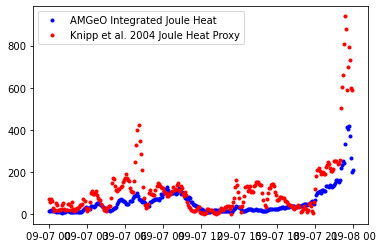

In [8]:
import matplotlib.pyplot as plt
f = plt.figure()
ax = plt.subplot(111)
ax.plot(ds.time,ds.int_joule_heat,'b.',label='AMGeO Integrated Joule Heat')
ax.plot(dts,jh_index,'r.',label='Knipp et al. 2004 Joule Heat Proxy')
ax.legend()


# Exercise 2

Calculate Cross Polar Cap Potential and Compare to AMPERE total current

Get total current file from [here](http://ampere.jhuapl.edu/products/itot/daily.html)

Remember to remove missing values from current file (9999.0)

In [9]:
import pandas as pd
def read_amp_Itot_dat(amp_Itot_fn):
    amp_Itot_names = ['year',
                'month',
                'day',
                'hour',
                'minute',
                'second',
                'I total up North [MA]', 
                'I total down North [MA]', 
                'I day up North [MA]', 
                'I day down North [MA]', 
                'I night up North [MA]', 
                'I night down North [MA]', 
                'I total up South [MA]', 
                'I total down South [MA]', 
                'I day up South [MA]', 
                'I day down South [MA]', 
                'I night up South [MA]', 
                'I night down South [MA]']
    df_amp = pd.read_csv(amp_Itot_fn,sep='\s+',names=amp_Itot_names,skiprows=1)
    df_amp['time']=pd.to_datetime(df_amp[['year','month','day','hour','minute','second']])
    df_amp.set_index('time',inplace=True)
    return df_amp
df_amp = read_amp_Itot_dat('ampere/amp_itot_daily_20170907.dat')

In [10]:
#Calculate cross polar cap potential
epot_da = ds['epot']
cpcp = epot_da.max(dim=('lat','lon'))-epot_da.min(dim=('lat','lon'))
ds['cpcp']=cpcp

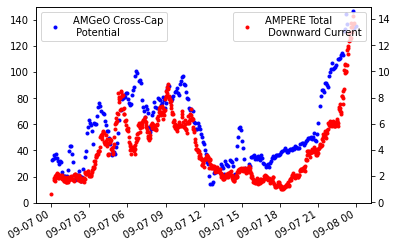

In [11]:
import matplotlib.pyplot as plt
f = plt.figure()
axl = plt.subplot(111)
axr = axl.twinx()
axl.plot(ds['time'],ds['cpcp']/1000,'b.',label='AMGeO Cross-Cap\n Potential')
axl.set_ylim([0,150])

varname = 'I total down North [MA]'
good = df_amp[varname]!=9999.00
axr.plot(df_amp.index[good],-1*df_amp[varname][good],'r.',label='AMPERE Total\n Downward Current')
axl.legend(loc='upper left')
axr.legend(loc='upper right')

#Format the x-axis nicely
f.autofmt_xdate()


In [12]:
ds

<xarray.Dataset>
Dimensions:         (time: 288, lat: 24, lon: 37)
Coordinates:
  * time            (time) datetime64[ns] 2017-09-07T00:02:30 ... 2017-09-07T...
  * lat             (lat) float64 88.33 86.67 85.0 83.33 ... 53.33 51.67 50.0
  * lon             (lon) float64 0.0 10.0 20.0 30.0 ... 330.0 340.0 350.0 360.0
Data variables: (12/14)
    E_ph            (time, lat, lon) float64 -0.01376 -0.01442 ... -0.0001178
    E_th            (time, lat, lon) float64 0.007904 0.005825 ... -7.189e-06
    cond_hall       (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    cond_ped        (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    epot            (time, lat, lon) float64 4.715e+03 5.192e+03 ... 1.129e+03
    int_joule_heat  (time) float64 13.63 15.22 19.02 16.76 ... 265.5 198.9 207.9
    ...              ...
    mpot            (time, lat, lon) float64 1.881 1.617 1.361 ... -1.55 -2.035
    sdB_ph          (time, lat, lon) float64 -28.92 -32.22 ... 2.262 3.546
    sdB_th          (time, lat, lon) float64 25.34 18.17 9.523 ... 3.866 3.898
    v_ph            (time, lat, lon) float64 134.5 99.11 ... 0.4663 -0.1472
    v_th            (time, lat, lon) float64 234.1 245.3 245.5 ... 0.2928 2.411
    cpcp            (time) float64 3.237e+04 3.344e+04 ... 1.339e+05 1.35e+05
Attributes:
    description:  AMGeO Assimilative Maps
    version:      v2_beta
    hemisphere:   N

# Exercise 3: Spatial Data

In [13]:
from apexpy import Apex

# from here, we can create an apex_out instance for coordinate conversion
apex_out = Apex(date=datetime.date(2017,9,7))
apex_out


In [14]:
# need to create 24x37 grid of lat & lons for conversion
amgeo_lats, amgeo_lons = np.zeros((24, 37)), np.zeros((24, 37))
for i in range(24):
    for j in range(37):
        amgeo_lats[i][j] = ds.lat.values[i]
        amgeo_lons[i][j] = ds.lon.values[j]
amgeo_lats, amgeo_lons = np.array(amgeo_lats), np.array(amgeo_lons)
amgeo_lats.shape, amgeo_lons.shape

# NOTE: AMGeO lons are mlt in degrees, so simple transform to move to apex mlt
mlt = amgeo_lons / 180 * 12

In [15]:
import numpy as np

def datetime64_to_datetime(dt64):
    """Convert a numpy.datetime64 
    (time format used by Pandas/Xarray) 
    to a Python datetime.datetime
    (format expected by Apexpy)"""
    return dt64.astype('M8[ms]').astype('O')

#Calculate the geographic locations corresponding to
#the AMGeO grid at every time

#Iterate across times
n_times = ds['time'].shape[0]
geo_lats = np.zeros((n_times,24,37))
geo_lons = np.zeros((n_times,24,37))
for i in range(n_times):
    #Choose the i-th time from the Dataset
    dt64 = ds['time'].values[i]
    
    #Convert between time formats
    dt = datetime64_to_datetime(dt64)

    # now, can convert to geodetic, AMGeO uses a reference height of 110km (the nominal F layer)
    # this is a time-dependent calculation, so we must use the datetime from the Dataset
    geo_lat, geo_lon = apex_out.convert(amgeo_lats, mlt, 'mlt', 'geo', datetime=dt, height=110)
    
    geo_lats[i,...]=geo_lat
    geo_lons[i,...]=geo_lon

#Add the geographic position to the XArray Dataset
ds['geo_lats'] = (('time','lat','lon'),geo_lats)
ds['geo_lons'] = (('time','lat','lon'),geo_lons)


# Get AMGeO predictions above a certain groundstation

Here's a movie of the Poker Flats All-Sky Camera for this date
http://optics.gi.alaska.edu/realtime/data/MPEG/PKR_DASC_256/2017/PKR_DASC_20170907_rgb.mpg

And this is how the Poker Flat spectrometer keogram looked:
http://optics.gi.alaska.edu/realtime/data/PKR_DMSP/Keo_15hr/Keo_15hr/2017/PKR_Keo_15hr_2017-09-07.png

In [124]:
#This is Poker Flats, Alaska
gs_glat = 65.12
gs_glon = -147.47
#We will find the Apex locations of the groundstation at the time
#of each AMGeO frame
gs_dts = []
gs_mlats = np.zeros((n_times,))
gs_mlts = np.zeros((n_times,))
gs_epots = np.zeros((n_times,))
gs_efields = np.zeros((n_times,))
gs_drifts = np.zeros((n_times,))
gs_jfacs = np.zeros((n_times,))

for i in range(n_times):
    #Choose the i-th time from the Dataset
    dt64 = ds['time'].values[i]
    
    #Convert between time formats
    dt = datetime64_to_datetime(dt64)
    
    #Calculate magnetic coordinates location
    gs_mlat, gs_mlt = apex_out.convert(gs_glat, gs_glon, 'geo', 'mlt', datetime=dt, height=1)
    
    #AMGeO's 'lon' is actually MLT in degrees
    gs_mlt_lon = gs_mlt/12/180
    
    #We can use XArray's sel method to extract the closest AMGeO data
    this_gs_ds = ds.sel({'lat':gs_mlat,'lon':gs_mlt_lon,'time':dt},method='nearest')
    
    #Store
    gs_dts.append(dt)
    gs_mlats[i]=gs_mlat
    gs_mlts[i]=gs_mlt
    gs_epots[i]=this_gs_ds['epot'].values/1000 #V->kV
    gs_efields[i]=np.sqrt(this_gs_ds['E_ph'].values**2+this_gs_ds['E_th'].values**2)*1000 #V/m-> mV/m
    gs_drifts[i]=np.sqrt(this_gs_ds['v_ph'].values**2+this_gs_ds['v_th'].values**2)
    gs_jfacs[i]=this_gs_ds['jfac'].values

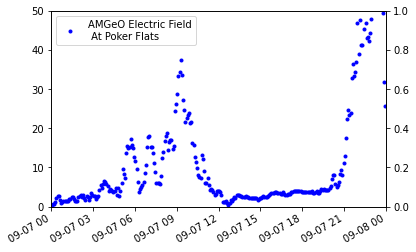

In [114]:
import matplotlib.pyplot as plt
f = plt.figure()
axl = plt.subplot(111)
axr = axl.twinx()
axl.plot(gs_dts,gs_efields,'b.',label='AMGeO Electric Field\n At Poker Flats')
axl.legend(loc='upper left')
axl.set_ylim([0,50])
axl.set_xlim([datetime.datetime(2017,9,7,0),datetime.datetime(2017,9,8,0)])
f.autofmt_xdate()

# Use Cartopy to Show Groundstation Position

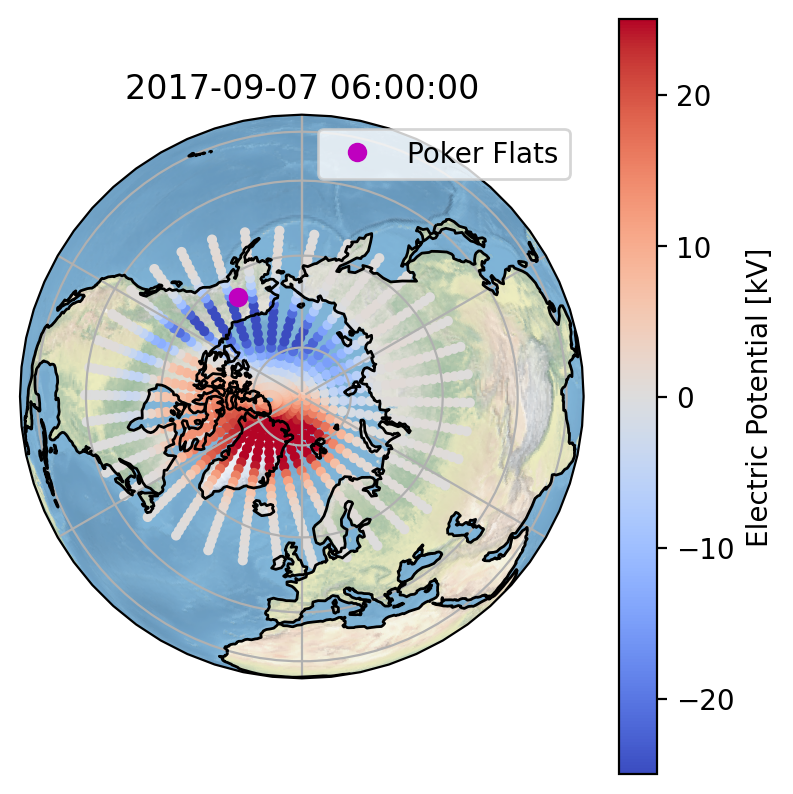

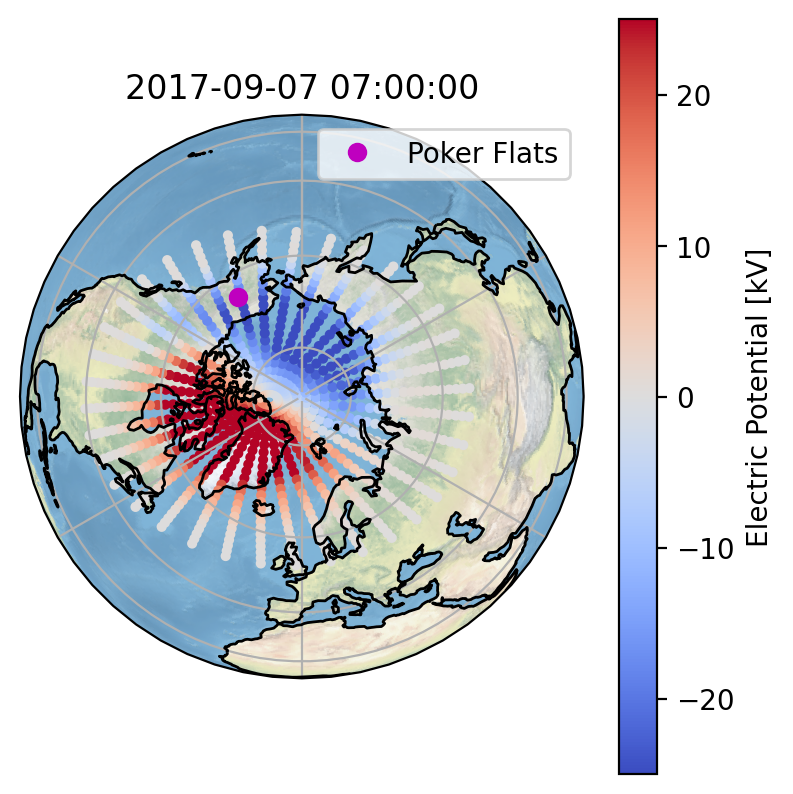

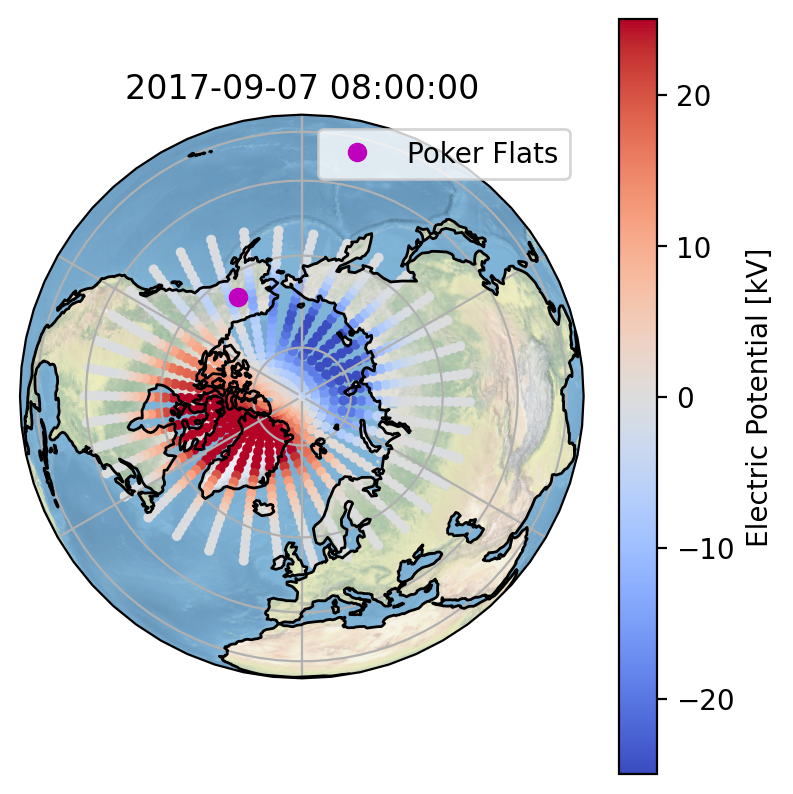

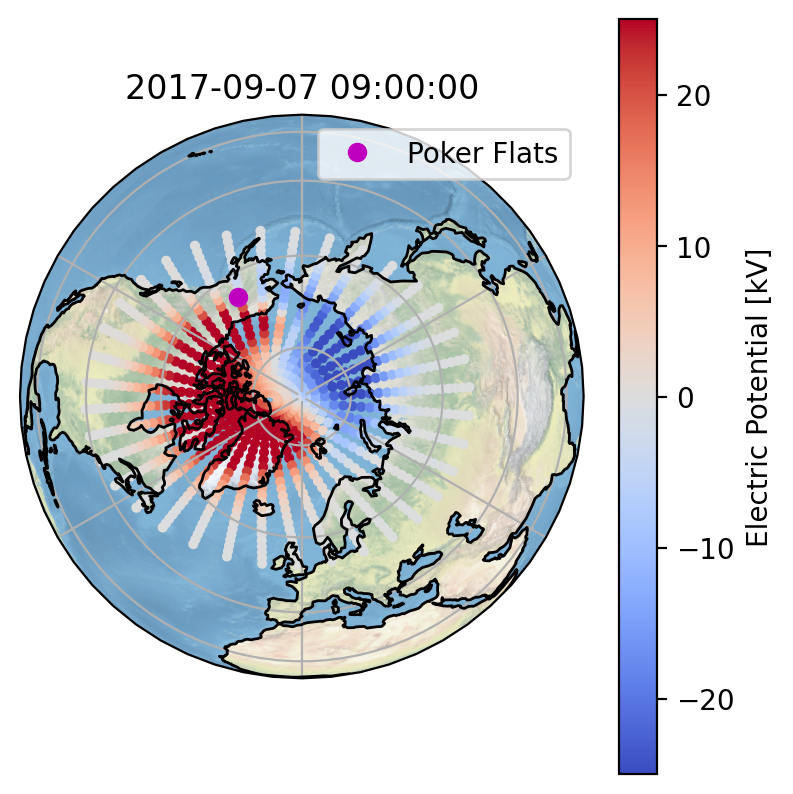

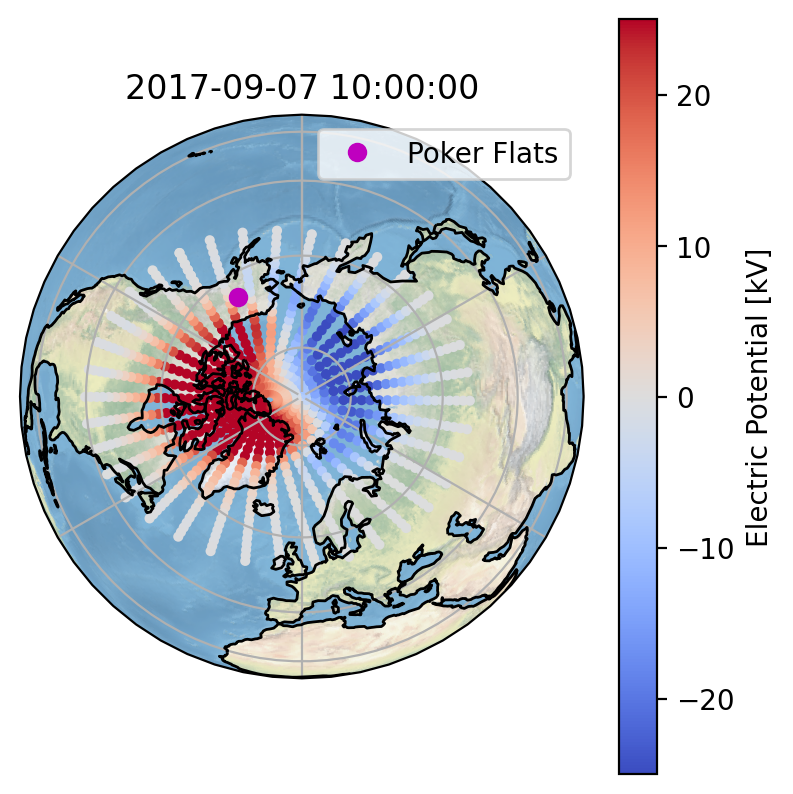

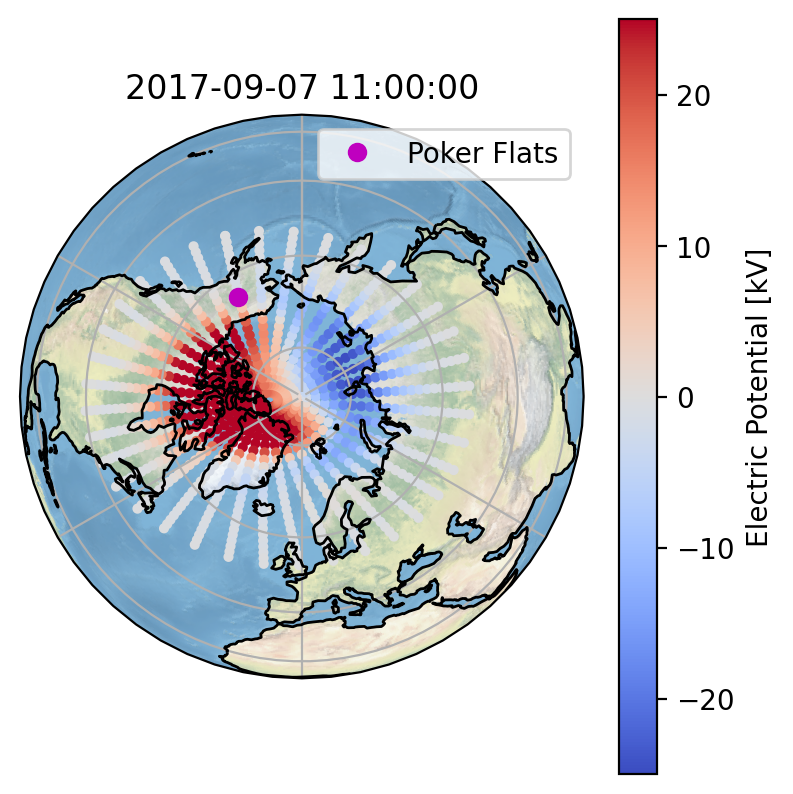

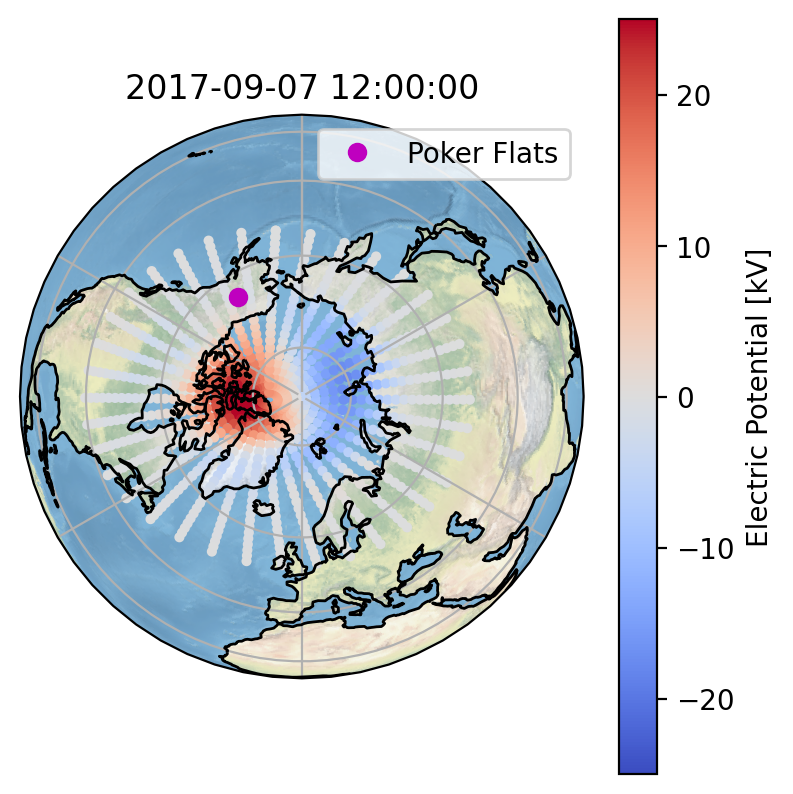

In [123]:
# cartopy
import cartopy.crs as crs


for hour in [6,7,8,9,10,11,12]:
    
    this_dt = datetime.datetime(2017,9,7,hour)
    
    fig = plt.figure(figsize=[10, 5],dpi=200)

    # Northern Hemisphere
    ax = fig.add_subplot(1, 2, 1, projection=crs.Orthographic(0, 90))

    ax.coastlines(zorder=3)
    ax.stock_img()
    ax.gridlines()

    this_ds = ds.sel({'time':this_dt},method='nearest') 

    mappable = ax.scatter(this_ds['geo_lons'], 
                          this_ds['geo_lats'], 
                          c=this_ds['epot']/1000,
                          s=7,
                          vmin=-25,vmax=25,cmap='coolwarm', 
                          transform=crs.PlateCarree())
    #Label poker flats
    ax.plot(gs_glon,gs_glat,'mo',label='Poker Flats',transform=crs.PlateCarree())
    ax.legend()

    fig.colorbar(mappable,label='Electric Potential [kV]')

    ax.set_title(f'{this_dt}')

    plt.show()

